### Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.applications import VGG19
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [3]:
train_df = pd.read_csv('C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\training_set.csv')
test_df = pd.read_csv('C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\Testing_set.csv')

In [4]:
train_df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [5]:
test_df.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


## Insights

In [6]:
train_df['label'].value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

In [7]:
HAR = train_df.label.value_counts()

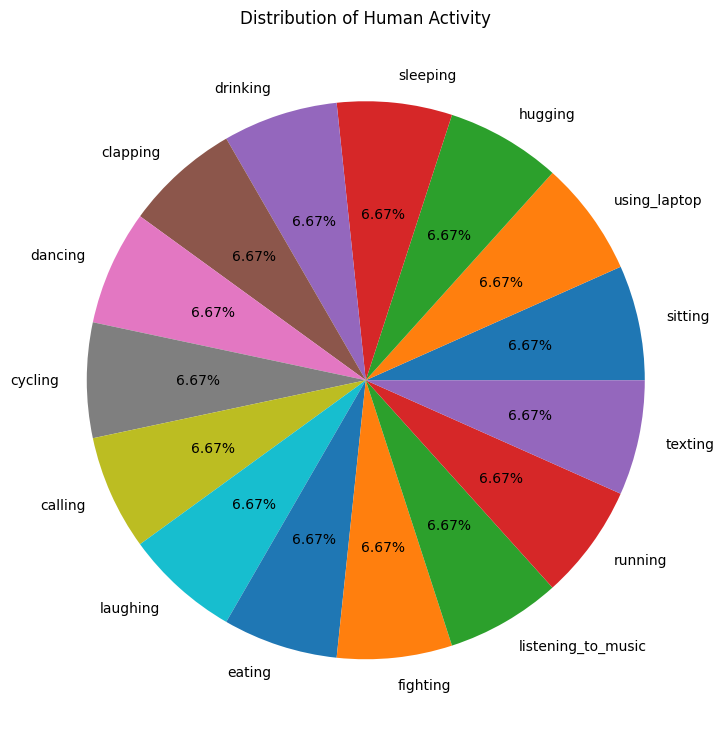

In [8]:
plt.figure(figsize=(9,12))
plt.title('Distribution of Human Activity')
plt.pie(HAR,labels = HAR.index,autopct='%1.2f%%')
plt.show()

In [9]:
HAR.index

Index(['sitting', 'using_laptop', 'hugging', 'sleeping', 'drinking',
       'clapping', 'dancing', 'cycling', 'calling', 'laughing', 'eating',
       'fighting', 'listening_to_music', 'running', 'texting'],
      dtype='object', name='label')

In [10]:
imagename = train_df['filename']

In [11]:
situation = train_df['label']

In [12]:
imagename

0            Image_1.jpg
1            Image_2.jpg
2            Image_3.jpg
3            Image_4.jpg
4            Image_5.jpg
              ...       
12595    Image_12596.jpg
12596    Image_12597.jpg
12597    Image_12598.jpg
12598    Image_12599.jpg
12599    Image_12600.jpg
Name: filename, Length: 12600, dtype: object

In [13]:
situation

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

## Making function which will randomely plot pictures

In [14]:
import random
import os
from PIL import Image
import matplotlib.image as img

In [15]:
def displaying_random_images():
    num = random.randint(1,10000)
    imgg = f"Image_{num}.jpg"
    train = "C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\train\\"
    if os.path.exists(train+imgg):
        testImage = img.imread(train+imgg)
        plt.imshow(testImage)
        plt.title("{}".format(train_df.loc[train_df['filename'] == f"{imgg}", 'label'].item()))

    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

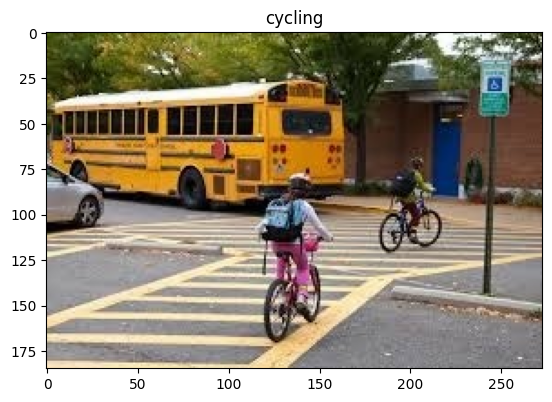

In [16]:
displaying_random_images()

In [17]:
def displaying_images():
    num = int(input('Enter Number Between 1 to 10000: '))
    if num > 0 & num <= 10000:
        imgg = f"Image_{num}.jpg"
        train = "C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\train\\"
        if os.path.exists(train+imgg):
            testImage = img.imread(train+imgg)
            plt.imshow(testImage)
            plt.title("{}".format(train_df.loc[train_df['filename'] == f"{imgg}", 'label'].item()))
    else:
        #print(train+img)
        print("File Path not found \nSkipping the file!!")

Enter Number Between 1 to 10000:  400


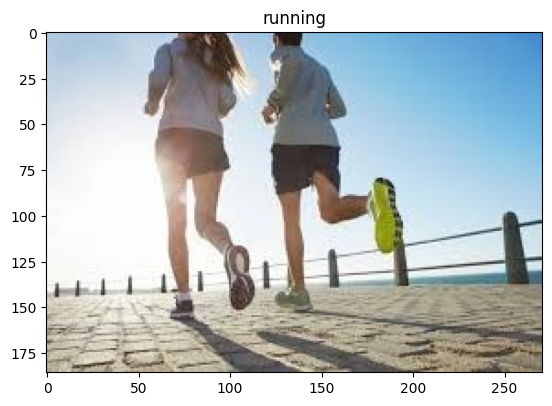

In [18]:
displaying_images()

### Preprocess Data

In [19]:
img_data = []
img_label = []

In [20]:
length = 12601
for i in (range(12600)):
    t = 'C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\train\\' + imagename[i]    
    temp_img = Image.open(t)
    img_data.append(np.asarray(temp_img.resize((160,160))))
    img_label.append(situation[i])

In [21]:
imagesdata = np.asarray(img_data)
type(imagesdata)

numpy.ndarray

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
train_df['label']

0                   sitting
1              using_laptop
2                   hugging
3                  sleeping
4              using_laptop
                ...        
12595               sitting
12596              clapping
12597               sitting
12598               dancing
12599    listening_to_music
Name: label, Length: 12600, dtype: object

In [24]:
y_train = to_categorical(np.asarray(train_df["label"].factorize()[0])) #numeric operation of array .factorize()

In [25]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### Load Pretrained-model

In [26]:
model = VGG19(include_top=False,weights="imagenet",input_shape=(160,160,3),pooling ="avg",classes=15)

for layer in model.layers:
    layer.trainable=False

In [27]:
from tensorflow.keras.models import Sequential
mod = Sequential()

In [28]:
mod.add(model)

In [29]:
mod.add(Flatten())

In [30]:
mod.add(Dense(512,activation='relu'))

In [31]:
mod.add(Dense(15,activation='softmax'))

### Compile Pretrained model

In [35]:
mod.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 15)                7695      
                                                                 
Total params: 20,294,735
Trainable params: 270,351
Non-trainable params: 20,024,384
_________________________________________________________________


### train pretrained model

In [37]:
history = mod.fit(imagesdata,y_train,epochs=10)

Epoch 1/10
394/394 [==============================] - 626s 2s/step - loss: 2.1178 - accuracy: 0.4598
Epoch 2/10
394/394 [==============================] - 576s 1s/step - loss: 1.1972 - accuracy: 0.6186
Epoch 3/10
394/394 [==============================] - 579s 1s/step - loss: 0.9356 - accuracy: 0.6937
Epoch 4/10
394/394 [==============================] - 573s 1s/step - loss: 0.7108 - accuracy: 0.7650
Epoch 5/10
394/394 [==============================] - 531s 1s/step - loss: 0.5314 - accuracy: 0.8271
Epoch 6/10
394/394 [==============================] - 539s 1s/step - loss: 0.3920 - accuracy: 0.8700
Epoch 7/10
394/394 [==============================] - 533s 1s/step - loss: 0.2725 - accuracy: 0.9147
Epoch 8/10
394/394 [==============================] - 503s 1s/step - loss: 0.2065 - accuracy: 0.9346
Epoch 9/10
394/394 [==============================] - 500s 1s/step - loss: 0.1683 - accuracy: 0.9454
Epoch 10/10
394/394 [==============================] - 517s 1s/step - loss: 0.1532 - accura

### evaluate pretrained model

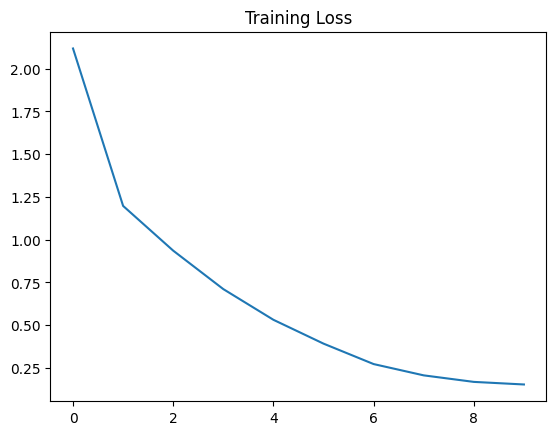

In [76]:
plt.title('Training Loss')
loss = history.history['loss']
plt.plot(loss)
plt.show()

In [77]:
print("Training Loss for each epoch:", loss)

Training Loss for each epoch: [2.1177735328674316, 1.1972203254699707, 0.935632050037384, 0.7108359932899475, 0.5313608050346375, 0.39204296469688416, 0.27253395318984985, 0.20649592578411102, 0.16834670305252075, 0.15322032570838928]


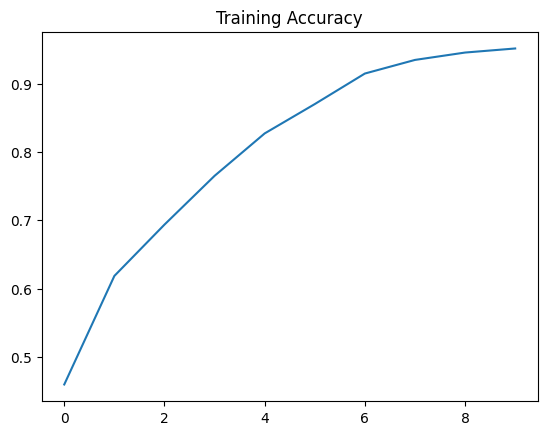

In [78]:
plt.title('Training Accuracy')
acc = history.history['accuracy']
plt.plot(acc)
plt.show()

In [80]:
print("Training Accuracy for each epoch:", acc)

Training Accuracy for each epoch: [0.45976191759109497, 0.618571400642395, 0.6936507821083069, 0.7649999856948853, 0.8270635008811951, 0.8700000047683716, 0.9146825671195984, 0.9346031546592712, 0.9453968405723572, 0.9513491988182068]


### Save model

In [46]:
mod.save('HAR.h5')

### Model predictions

In [57]:
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [59]:
def test_predict(test_image):
    result = mod.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 [==============================] - 1s 537ms/step
probability: 100.0%
Predicted class :  4


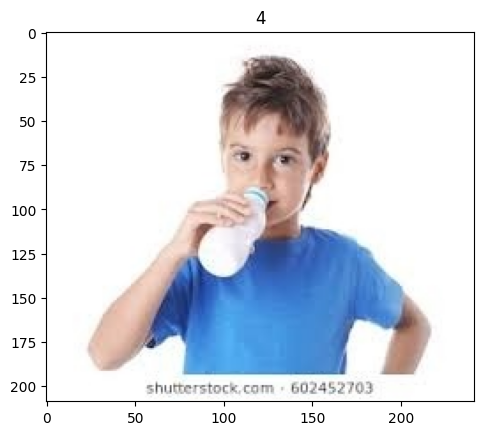

In [60]:
test_predict("C:\\Users\\solan\\Downloads\\Projects\\PROJECT_3_HUMAN_ACTIVITY_RECOGNITION\\Human Action Recognition\\test\\Image_101.jpg")

In [74]:
history.history.values()

dict_values([[2.1177735328674316, 1.1972203254699707, 0.935632050037384, 0.7108359932899475, 0.5313608050346375, 0.39204296469688416, 0.27253395318984985, 0.20649592578411102, 0.16834670305252075, 0.15322032570838928], [0.45976191759109497, 0.618571400642395, 0.6936507821083069, 0.7649999856948853, 0.8270635008811951, 0.8700000047683716, 0.9146825671195984, 0.9346031546592712, 0.9453968405723572, 0.9513491988182068]])